# What will be the result current Ebola outbreak in the Democratic Republic of the Congo?

### Project 1 Ebola
Sander Miller and Riya Aggarwal

In [303]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

Set up State Variables 
- Population
- Current Date
- Infected Population - 35 People
- Vulnerable Population (almost all initially)
- Cured/Immune Population (low initially) - 37 People
- Dead Population (low initially) - 61 People

In [304]:
state = State(totalPop = 78740000, # Starting population of DRC
              infPop = 35,         # Initial Infected Population
              vulnPop = 78739928,  # Initial Vulnerable Population
              curedPop = 37,       # Initial Cured/Immune Population
              deadPop = 61)       # Initial Dead Population 

,values
totalPop,78740000
infPop,35
vulnPop,78739928
curedPop,37
deadPop,61


Set up System Variables
- Intial Population
- Initial Date to End Date
- Infection Rate (Percent chance of getting sick if healthy)
- Death Rate (Percent chance of getting dying if sick)
    - If possible, would like to link to time as well 
- Cure Rate (Percent chance of getting cured if sick)
    - Sidenote: If cured, is now immune to the disease so subtract from vulnerable population

In [305]:
system = System(p_0 = 78740000,   # Initial Population of DRC
                t_0=0,            # Time Started (day zero)
                t_end=1400,       # Time Ended (what we're trying to find)
                infRate = 0.001,  # Percent chance of being infected if healthy
                deathRate = 0.6,  # Percent chance of dying if sick
                cureRate = 0.36)  # Percent chance of being cured if sick

,values
p_0,7.874000e+07
t_0,0.000000e+00
t_end,1.400000e+03
infRate,1.000000e-03
deathRate,6.000000e-01
cureRate,3.600000e-01


### Functions from the before

In [306]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [307]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0;
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

### Update Function 


In [308]:
def update_func(state1, t, system):
    
    state.deadPop += system.deathRate * state.infPop
    state.infPop = (1 - (system.deathRate + system.cureRate)) * state.infPop + (system.infRate * state.vulnPop)
    state.curedPop += system.cureRate * state.infPop
    state.vulnPop -= system.infRate * state.vulnPop
    
    state.totalPop = state.infPop + state.curedPop + state.vulnPop 
    # return State(totalPop = 78740000, infPop = 35, vulnPop = 78739928, curedPop = 37, deadPop = 61)
    return state.totalPop

In [309]:
update_func(state, system.t_0, system)

78768312

In [310]:
results = run_simulation(system, update_func);
time = linrange(system.t_0, system.t_end, 1, endpoint=True)
state

,values
totalPop,41660996
infPop,20212
vulnPop,19383651
curedPop,22257133
deadPop,37083682


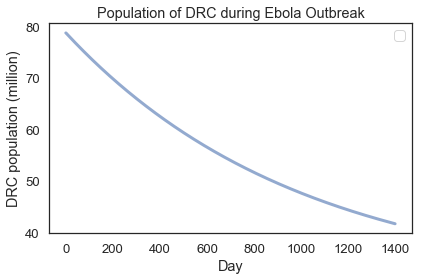

In [311]:
plot (time, results/1e6)
decorate(xlabel='Day', 
         ylabel='DRC population (million)',
         title='Population of DRC during Ebola Outbreak')

In [312]:
results

,values
0,78740000.0
1,78722170.0
2,78673098.0
3,78623958.0
4,78574860.0
5,78525811.0
6,78476812.0
7,78427861.0
8,78378960.0
9,78330106.0
